# Aim:- To understand the working of RNN model and Implementing it using tensorflow 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
dataset_train = pd.read_csv('GOOGLE_Stock_Price_Train.csv')

training_set = dataset_train.iloc[:, 1:2].values 

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 1257):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
regressor = Sequential() 

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True)) 

regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(Dense(units = 1))

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32) 

Epoch 1/200
38/38 [==============================] - 7s 58ms/step - loss: 0.0451
Epoch 2/200
38/38 [==============================] - 3s 79ms/step - loss: 0.0060
Epoch 3/200
38/38 [==============================] - 3s 77ms/step - loss: 0.0057
Epoch 4/200
38/38 [==============================] - 3s 79ms/step - loss: 0.0052
Epoch 5/200
38/38 [==============================] - 3s 77ms/step - loss: 0.0048
Epoch 6/200
38/38 [==============================] - 3s 77ms/step - loss: 0.0045
Epoch 7/200
38/38 [==============================] - 3s 81ms/step - loss: 0.0047
Epoch 8/200
38/38 [==============================] - 3s 78ms/step - loss: 0.0051
Epoch 9/200
38/38 [==============================] - 3s 77ms/step - loss: 0.0052
Epoch 10/200
38/38 [==============================] - 3s 80ms/step - loss: 0.0043
Epoch 11/200
38/38 [==============================] - 3s 79ms/step - loss: 0.0043
Epoch 12/200
38/38 [==============================] - 3s 81ms/step - loss: 0.0045
Epoch 13/200
38/38 [=====

38/38 [==============================] - 3s 78ms/step - loss: 0.0014
Epoch 101/200
38/38 [==============================] - 3s 78ms/step - loss: 0.0015
Epoch 102/200
38/38 [==============================] - 3s 78ms/step - loss: 0.0015
Epoch 103/200
38/38 [==============================] - 3s 79ms/step - loss: 0.0014
Epoch 104/200
38/38 [==============================] - 3s 80ms/step - loss: 0.0016
Epoch 105/200
38/38 [==============================] - 3s 81ms/step - loss: 0.0014
Epoch 106/200
38/38 [==============================] - 3s 84ms/step - loss: 0.0014
Epoch 107/200
38/38 [==============================] - 3s 80ms/step - loss: 0.0013
Epoch 108/200
38/38 [==============================] - 3s 79ms/step - loss: 0.0013
Epoch 109/200
38/38 [==============================] - 3s 79ms/step - loss: 0.0016
Epoch 110/200
38/38 [==============================] - 3s 80ms/step - loss: 0.0014
Epoch 111/200
38/38 [==============================] - 3s 79ms/step - loss: 0.0014
Epoch 112/200
38/3

38/38 [==============================] - 4s 95ms/step - loss: 9.7904e-04
Epoch 198/200
38/38 [==============================] - 4s 108ms/step - loss: 0.0011
Epoch 199/200
38/38 [==============================] - 4s 107ms/step - loss: 0.0010
Epoch 200/200
38/38 [==============================] - 4s 96ms/step - loss: 0.0011


Part 3 - Making the predictions and visualising the results

In [15]:
dataset_test = pd.read_csv('GOOGLE_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values #getting input of each previous financial days
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


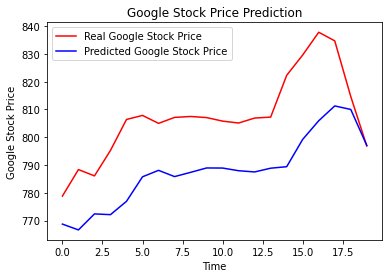

In [17]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Conclusion:- In this experiment we implemented CNN model and came to know that CNN is used instead of ANN for detecting sequences it have low computation cost and gives out instant output of current insance.